In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

#%matplotlib inline

C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\l

In [1]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    By convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [21]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(9, 12),
                    image_name=None):
    """Wrapper function to visualize/save image with detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
    image_np_with_annotations = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    else:
        plt.imshow(image_np_with_annotations)

In [22]:
def rename_images(path):
    """
    Wrapper function rename image files
    Args:
    path: directory containing the images
    """
    counter = 1
    for f in os.listdir(path):
        suffix = f.split('.')[-1]
        new = f'{str(counter)}.{suffix}'
        os.rename(path + f, path + new)
        counter = int(counter) + 1

In [29]:
train_imagepath = 'C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/images/training/'
rename_images(train_imagepath)

In [62]:
val_imagepath = 'C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/images/val/'
rename_images(val_imagepath)

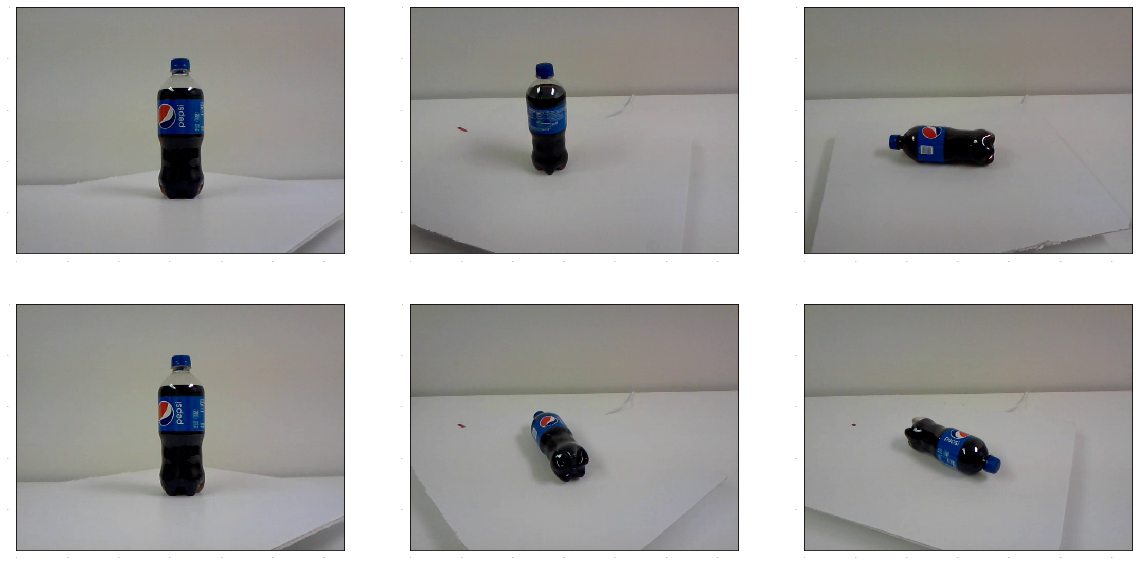

In [30]:
# Load images and visualize
train_images_np = []
for i in range(1, 7):
    image_path = os.path.join(train_imagepath, str(i) + '.jpg')
    train_images_np.append(load_image_into_numpy_array(image_path))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [20, 10]

for idx, train_image_np in enumerate(train_images_np):
    plt.subplot(2, 3, idx+1)
    plt.imshow(train_image_np)
plt.show()

In [31]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [33]:
train_image_path = os.path.join('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/', 'annotations/xmls/training/')
xml_df = xml_to_csv(train_image_path)
xml_df.to_csv('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/data/train_labels.csv', index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [63]:
val_image_path = os.path.join('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/', 'annotations/xmls/val/')
xml_df = xml_to_csv(val_image_path)
xml_df.to_csv('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/data/val_labels.csv', index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [37]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

In [38]:
# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == 'pepsi':
        return 1
    else:
        None

In [39]:
def split(df, group):
    print('I am here')
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

In [40]:
def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [42]:
writer = tf.python_io.TFRecordWriter('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/data/train.record')
print('Okay2')
path = os.path.join('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/images/training')
print('Okay3')
examples = pd.read_csv('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/data/train_labels.csv')
print('Okay4')
grouped = split(examples, 'filename')
print('grouped')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())
writer.close()

Okay2
Okay3
Okay4
I am here
grouped


In [64]:
writer = tf.python_io.TFRecordWriter('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/data/val.record')
path = os.path.join('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/images/val')
examples = pd.read_csv('C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/data/val_labels.csv')
grouped = split(examples, 'filename')
print('grouped')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())
writer.close()

I am here
grouped


In [ ]:
from object_detection import model_lib, model_hparams

C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\l

In [79]:
pipeline_config_path = 'C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'
model_dir = 'C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/ssd_mobilenet_v2_coco_2018_03_29/'
checkpoint_dir = 'C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/checkpoints/'

config = tf.estimator.RunConfig(model_dir=model_dir)
num_train_steps=1000
train_and_eval_dict = model_lib.create_estimator_and_inputs(
    run_config=config,
    hparams=model_hparams.create_hparams(None),
    pipeline_config_path=pipeline_config_path,
    train_steps =num_train_steps,
    sample_1_of_n_eval_examples = 1
    )
estimator = train_and_eval_dict['estimator']
train_input_fn = train_and_eval_dict['train_input_fn']
eval_input_fns = train_and_eval_dict['eval_input_fns']
eval_on_train_input_fn = train_and_eval_dict['eval_on_train_input_fn']
predict_input_fn = train_and_eval_dict['predict_input_fn']
train_steps = train_and_eval_dict['train_steps']

INFO:tensorflow:Maybe overwriting train_steps: 1000
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_tpu False
INFO:tensorflow:Using config: {'_model_dir': 'C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/ssd_mobilenet_v2_coco_2018_03_29/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_di

In [83]:
input_fn = eval_on_train_input_fn
max_eval_retries = 1
estimator.evaluate(input_fn, steps=None, checkpoint_path=tf.train.latest_checkpoint(checkpoint_dir))
train_spec, eval_specs = model_lib.create_train_and_eval_specs(
        train_input_fn,
        eval_input_fns,
        eval_on_train_input_fn,
        predict_input_fn,
        train_steps,
        eval_on_train_data=True)
tf.estimator.train_and_evaluate(estimator,train_spec,eval_specs[0])

ERROR:tensorflow:Couldn't match files for checkpoint C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt
INFO:tensorflow:Could not find trained model in model_dir: C:/Users/Riju/Miniconda3/envs/TensorFlow-GPU/Lib/site-packages/tensorflow/models/ssd_mobilenet_v2_coco_2018_03_29/, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-06T12:51:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.01s)
creating index...
index created!


InvalidArgumentError: TypeError: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
Traceback (most recent call last):

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\numpy\core\function_base.py", line 117, in linspace
    >>> x2 = np.linspace(0, 10, N, endpoint=False)

TypeError: 'numpy.float64' object cannot be interpreted as an integer


During handling of the above exception, another exception occurred:


Traceback (most recent call last):

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\ops\script_ops.py", line 209, in __call__
    ret = func(*args)

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\metrics\coco_evaluation.py", line 358, in first_value_func
    self._metrics = self.evaluate()

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\metrics\coco_evaluation.py", line 209, in evaluate
    coco_wrapped_groundtruth, coco_wrapped_detections, agnostic_mode=False)

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\metrics\coco_tools.py", line 170, in __init__
    iouType=iou_type)

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\pycocotools\cocoeval.py", line 76, in __init__
    self.params = Params(iouType=iouType) # parameters

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\pycocotools\cocoeval.py", line 527, in __init__
    self.setDetParams()

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\pycocotools\cocoeval.py", line 507, in setDetParams
    self.iouThrs = np.linspace(.5, 0.95, np.round((0.95 - .5) / .05) + 1, endpoint=True)

  File "<__array_function__ internals>", line 6, in linspace

  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\numpy\core\function_base.py", line 121, in linspace
    [<matplotlib.lines.Line2D object at 0x...>]

TypeError: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


	 [[node PyFunc_3 (defined at C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\metrics\coco_evaluation.py:368) ]]

Original stack trace for 'PyFunc_3':
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3242, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-f6397a289849>", line 3, in <module>
    estimator.evaluate(input_fn, steps=None, checkpoint_path=tf.train.latest_checkpoint(checkpoint_dir))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 477, in evaluate
    name=name)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 519, in _actual_eval
    return _evaluate()
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 501, in _evaluate
    self._evaluate_build_graph(input_fn, hooks, checkpoint_path))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1501, in _evaluate_build_graph
    self._call_model_fn_eval(input_fn, self.config))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1537, in _call_model_fn_eval
    features, labels, ModeKeys.EVAL, config)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1146, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\model_lib.py", line 454, in model_fn
    eval_config, list(category_index.values()), eval_dict)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\eval_util.py", line 916, in get_eval_metric_ops_for_evaluators
    eval_dict))
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\object_detection\metrics\coco_evaluation.py", line 368, in get_estimator_eval_metric_ops
    first_value_op = tf.py_func(first_value_func, [], tf.float32)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\util\deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\ops\script_ops.py", line 480, in py_func
    return py_func_common(func, inp, Tout, stateful, name=name)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\ops\script_ops.py", line 462, in py_func_common
    func=func, inp=inp, Tout=Tout, stateful=stateful, eager=False, name=name)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\ops\script_ops.py", line 285, in _internal_py_func
    input=inp, token=token, Tout=Tout, name=name)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\ops\gen_script_ops.py", line 158, in py_func
    "PyFunc", input=input, token=token, Tout=Tout, name=name)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\Riju\Miniconda3\envs\TensorFlow-GPU\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
